Import libaries

In [259]:
import pandas as pd
import spacy
import tensorflow as tf
import seaborn as sns

In [260]:
disaster = pd.read_csv("train.csv")
disaster.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [261]:
disaster.shape

(7613, 5)

In [262]:
disaster.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


0    57.03
1    42.97
Name: target, dtype: float64


<AxesSubplot: xlabel='target', ylabel='count'>

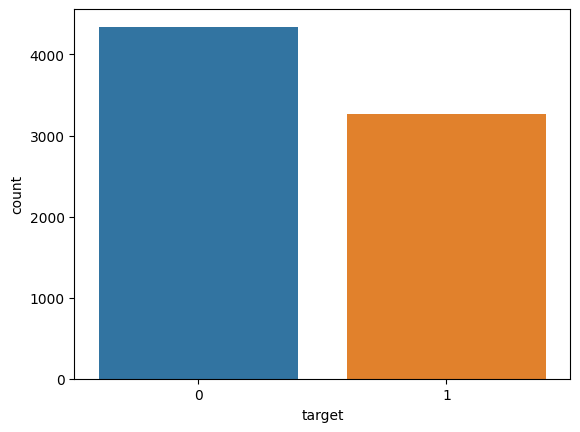

In [263]:
print((100*disaster.target.value_counts()/len(disaster)).round(2))
sns.countplot(x = disaster["target"])

In [264]:
!python -m spacy download en_core_web_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-10-22 16:43:51.949272: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-22 16:43:51.949645: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-22 16:43:59.489735: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-22 16:43:59.490129: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-22 16:43:59.496075: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-5R7882FN
2022-10-22 16:43:59.496485: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-5R7882FN

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip instal

In [265]:
import en_core_web_sm
nlp = en_core_web_sm.load()

# Import Stop words 
from spacy.lang.en.stop_words import STOP_WORDS

We create a complete corpus of text in a variable:

In [266]:
# Stripped corpus of text
stripped_corpus = [text.strip() for text in disaster["text"]]
# Join corpus to make one full string
full_corpus = " ".join(stripped_corpus)

Now load your clean corpus in a doc object.

In [9]:
doc = nlp(full_corpus)

create a first word cloud

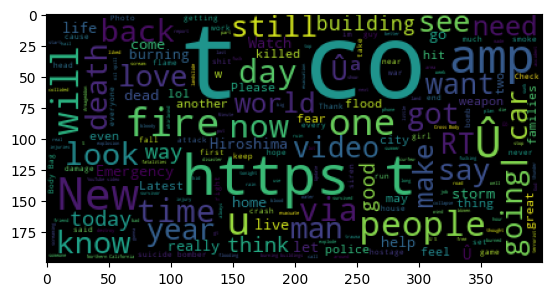

In [267]:
# Import matplotlib and wordcloud 
import matplotlib.pyplot as plt
import wordcloud


# Instanciate WordCloud 
wd = wordcloud.WordCloud()
cloud = wd.generate(doc.text)

# Show word cloud with matplotlib 
plt.imshow(cloud)

# Remove trailing logs 
plt.show()

# Preprocessing text

In [268]:
# Remove all non alphanumeric characters except whitespaces
disaster["text_clean"] = disaster["text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
# remove double spaces and spaces at the beginning and end of strings
disaster["text_clean"] = disaster["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# remove stop words and replace everyword with their lemma
disaster["text_clean"] = disaster["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

In [269]:
disaster

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,giant crane hold bridge collapse nearby home h...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5 km s volcano hawaii httptcozdto...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate ebike collide car little po...


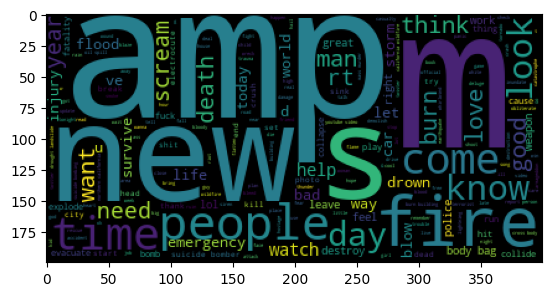

In [270]:
# Stripped corpus of text
stripped_corpus_clean = [text.strip() for text in disaster["text_clean"]]
# Join corpus to make one full string
full_corpus_clean = " ".join(stripped_corpus_clean)
# load your clean corpus in a doc object

# Generate wordcloud
cloud = wd.generate(full_corpus_clean)

# Show word cloud with matplotlib 
plt.imshow(cloud)

# Remove trailing logs 
plt.show()

Tokenizer, process to encoding all the tweets 

In [271]:
import numpy as np
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 1000, oov_token= "<OOV>") # instanciate the tokenizer
tokenizer.fit_on_texts(disaster.text_clean)
disaster["text_encoded"] = tokenizer.texts_to_sequences(disaster.text_clean)

In [272]:
disaster.head()

,id,keyword,location,text,target,text_clean,text_encoded
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,"[1, 413, 173, 1, 1]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 4, 162, 512, 1, 1, 1]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[1, 445, 1, 324, 1, 293, 188, 1, 324, 281, 380]"
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,"[1, 8, 1, 69, 188, 281, 36]"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfire pour...,"[259, 181, 123, 1, 1, 174, 69, 1, 112]"


In [273]:
# add zero padding at the end  of your sequences so they all have equal length.
disaster_pad = tf.keras.preprocessing.sequence.pad_sequences(disaster.text_encoded, padding="post")
# keep the length to predictions
maxlen = disaster_pad.shape[1]

In [274]:
from sklearn.model_selection import train_test_split
# Train Test Split
xtrain, xval, ytrain, yval = train_test_split(disaster_pad,disaster.target, test_size=0.2, stratify=disaster.target)

In [275]:
# create the tensor dataset for the training, and validation set.
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

In [276]:
# use .shuffle on the train set, and .batch on both sets to organise them by batches of 64 observations.
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [277]:
 # look a batch 
for tweet, target in train_batch.take(1):
    print(tweet, target)

tf.Tensor(
[[  1 404 505 ...   0   0   0]
 [106  24 293 ...   0   0   0]
 [  1   3   1 ...   0   0   0]
 ...
 [  1 895 835 ...   0   0   0]
 [ 21  44   1 ...   0   0   0]
 [  1   1   1 ...   0   0   0]], shape=(64, 25), dtype=int32) tf.Tensor(
[0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0], shape=(64,), dtype=int64)


# Base model : an embedding

In [278]:
vocab_size = tokenizer.num_words
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[tweet.shape[1],],name="embedding"),
                  # Gobal average pooling
                  tf.keras.layers.GlobalAveragePooling1D(),

                  # Couche Dense classique
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),
                  
                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [279]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 32)            32032     
                                                                 
 global_average_pooling1d_9   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_79 (Dense)            (None, 16)                528       
                                                                 
 dense_80 (Dense)            (None, 8)                 136       
                                                                 
 dense_81 (Dense)            (None, 1)                 9         
                                                                 
Total params: 32,705
Trainable params: 32,705
Non-trainable params: 0
_________________________________________________

In [280]:
optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [281]:
history = model.fit(train_batch, 
                    epochs=10, 
                    validation_data=val_batch)

Epoch 1/10
96/96 [==============================] - 1s 4ms/step - loss: 0.6867 - accuracy: 0.5680 - val_loss: 0.6788 - val_accuracy: 0.5706
Epoch 2/10
96/96 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.5704 - val_loss: 0.6495 - val_accuracy: 0.5726
Epoch 3/10
96/96 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7138 - val_loss: 0.5132 - val_accuracy: 0.7669
Epoch 4/10
96/96 [==============================] - 0s 3ms/step - loss: 0.4433 - accuracy: 0.8118 - val_loss: 0.4642 - val_accuracy: 0.7859
Epoch 5/10
96/96 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.8289 - val_loss: 0.4665 - val_accuracy: 0.7905
Epoch 6/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8337 - val_loss: 0.4732 - val_accuracy: 0.7879
Epoch 7/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8365 - val_loss: 0.4753 - val_accuracy: 0.7899
Epoch 8/10
96/96 [==

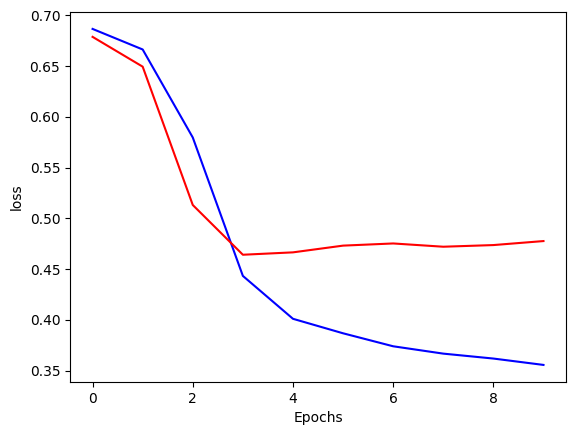

In [282]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

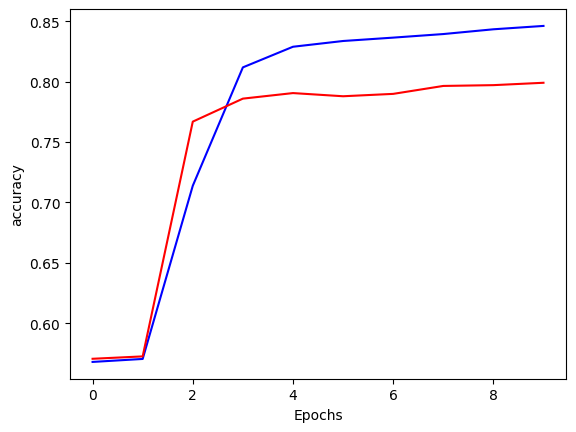

In [283]:
# Visualization of accuracy training 
plt.plot(history.history["accuracy"], color="b")
plt.plot(history.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

In [290]:
model.save("model_emb.h5")

## SimpleRNN

In [320]:
vocab_size = tokenizer.num_words
model_rnn = tf.keras.Sequential([
                  # Word Embedding layer           
                  tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[tweet.shape[1],],name="embedding"),
                  # Gobal average pooling
                  tf.keras.layers.SimpleRNN(units=32, return_sequences=True), # maintains the sequential nature
                  tf.keras.layers.SimpleRNN(units=16, return_sequences=False), # returns the last output
                  # Dense layers once the data is flat
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),
                  # output layer with as many neurons as the number of classes
                  # for the target variable and softmax activation
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [321]:
model_rnn.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 32)            32032     
                                                                 
 simple_rnn_18 (SimpleRNN)   (None, 25, 32)            2080      
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 16)                784       
                                                                 
 dense_91 (Dense)            (None, 16)                272       
                                                                 
 dense_92 (Dense)            (None, 8)                 136       
                                                                 
 dense_93 (Dense)            (None, 1)                 9         
                                                                 
Total params: 35,313
Trainable params: 35,313
Non-tra

In [322]:
optimizer= tf.keras.optimizers.Adam()

model_rnn.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

In [323]:
history_rnn = model_rnn.fit(train_batch, 
                    epochs=10, 
                    validation_data=val_batch)

Epoch 1/10
96/96 [==============================] - 4s 14ms/step - loss: 0.6518 - accuracy: 0.6435 - val_loss: 0.5921 - val_accuracy: 0.7137
Epoch 2/10
96/96 [==============================] - 1s 11ms/step - loss: 0.5258 - accuracy: 0.7567 - val_loss: 0.5209 - val_accuracy: 0.7649
Epoch 3/10
96/96 [==============================] - 1s 11ms/step - loss: 0.4402 - accuracy: 0.8153 - val_loss: 0.5123 - val_accuracy: 0.7702
Epoch 4/10
96/96 [==============================] - 1s 11ms/step - loss: 0.3782 - accuracy: 0.8453 - val_loss: 0.5266 - val_accuracy: 0.7728
Epoch 5/10
96/96 [==============================] - 1s 11ms/step - loss: 0.3335 - accuracy: 0.8667 - val_loss: 0.5474 - val_accuracy: 0.7636
Epoch 6/10
96/96 [==============================] - 1s 11ms/step - loss: 0.2977 - accuracy: 0.8837 - val_loss: 0.5468 - val_accuracy: 0.7807
Epoch 7/10
96/96 [==============================] - 1s 11ms/step - loss: 0.2574 - accuracy: 0.9020 - val_loss: 0.6719 - val_accuracy: 0.7551
Epoch 8/10
96

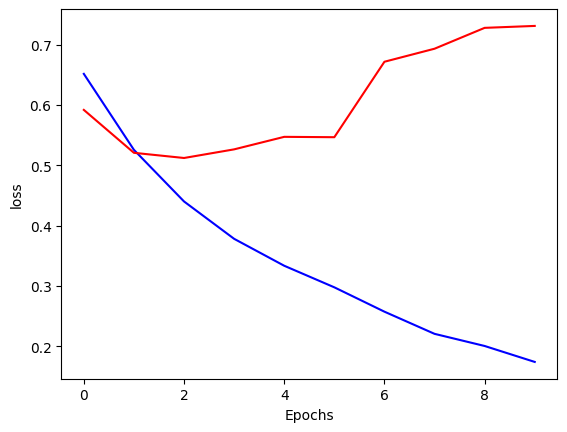

In [324]:
# Visualization of the training process on the loss function 
plt.plot(history_rnn.history["loss"], color="b")
plt.plot(history_rnn.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

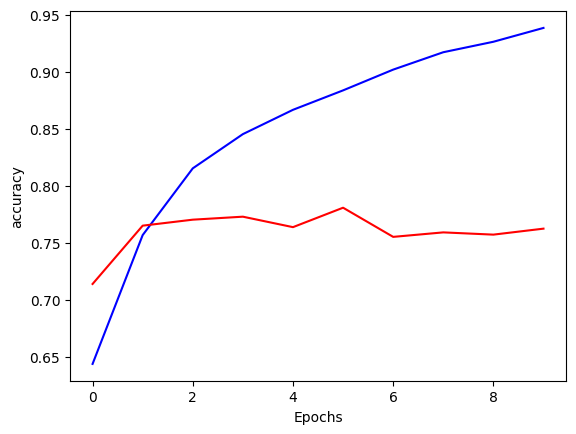

In [325]:
# Visualization of accuracy training 
plt.plot(history_rnn.history["accuracy"], color="b")
plt.plot(history_rnn.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

In [326]:
model_rnn.save("model_simpleRNN.h5")

## GRU

In [327]:
# from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

vocab_size = len(tokenizer.word_index)
model_gru = tf.keras.Sequential([
                  tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[tweet.shape[1],],name="embedding"),
                  tf.keras.layers.GRU(units = 32, return_sequences=True), # maintains the sequential nature
                  tf.keras.layers.GRU(units=16, return_sequences=False), # returns the last output
                  # tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [328]:
model_gru.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 32)            652192    
                                                                 
 gru_24 (GRU)                (None, 25, 32)            6336      
                                                                 
 gru_25 (GRU)                (None, 16)                2400      
                                                                 
 dense_94 (Dense)            (None, 8)                 136       
                                                                 
 dense_95 (Dense)            (None, 1)                 9         
                                                                 
Total params: 661,073
Trainable params: 661,073
Non-trainable params: 0
_________________________________________________________________


In [329]:
optimizer= tf.keras.optimizers.Adam()

model_gru.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [330]:
history_gru = model_gru.fit(train_batch, 
                            epochs=10, 
                            validation_data=val_batch)

Epoch 1/10
96/96 [==============================] - 10s 60ms/step - loss: 0.6858 - accuracy: 0.5673 - val_loss: 0.6832 - val_accuracy: 0.5706
Epoch 2/10
96/96 [==============================] - 5s 50ms/step - loss: 0.6669 - accuracy: 0.5859 - val_loss: 0.5446 - val_accuracy: 0.7466
Epoch 3/10
96/96 [==============================] - 5s 47ms/step - loss: 0.4547 - accuracy: 0.8005 - val_loss: 0.4672 - val_accuracy: 0.7892
Epoch 4/10
96/96 [==============================] - 5s 48ms/step - loss: 0.4008 - accuracy: 0.8309 - val_loss: 0.4710 - val_accuracy: 0.8004
Epoch 5/10
96/96 [==============================] - 5s 47ms/step - loss: 0.3816 - accuracy: 0.8402 - val_loss: 0.4713 - val_accuracy: 0.7938
Epoch 6/10
96/96 [==============================] - 5s 47ms/step - loss: 0.3670 - accuracy: 0.8470 - val_loss: 0.4858 - val_accuracy: 0.7912
Epoch 7/10
96/96 [==============================] - 5s 48ms/step - loss: 0.3588 - accuracy: 0.8539 - val_loss: 0.4809 - val_accuracy: 0.7879
Epoch 8/10
9

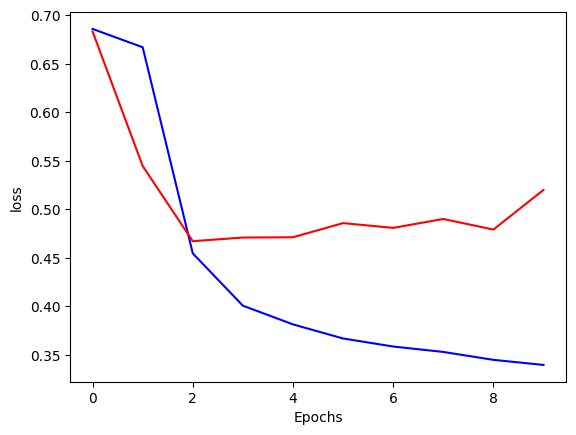

In [331]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history_gru.history["loss"], color="b")
plt.plot(history_gru.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

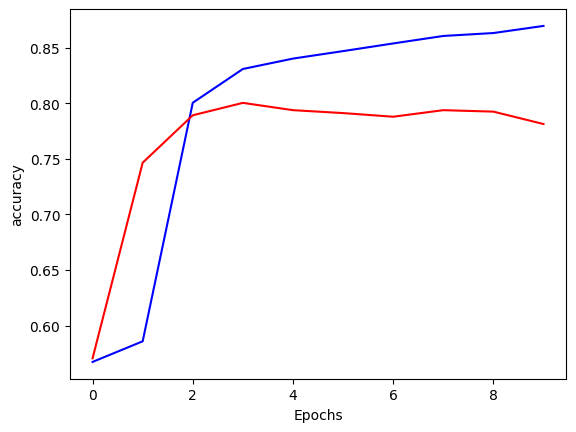

In [332]:
# Visualization of accuracy training 
plt.plot(history_gru.history["accuracy"], color="b")
plt.plot(history_gru.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

In [333]:
model_gru.save("model_gru.h5")

# LSTM

In [334]:
model_lstm = tf.keras.Sequential([
                  tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[tweet.shape[1],],name="embedding"),
                  tf.keras.layers.LSTM(units=32, return_sequences=True), # maintains the sequential nature
                  tf.keras.layers.LSTM(units=16, return_sequences=False), # returns the last output
                  # tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [335]:
model_lstm.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 32)            652192    
                                                                 
 lstm_5 (LSTM)               (None, 25, 32)            8320      
                                                                 
 lstm_6 (LSTM)               (None, 16)                3136      
                                                                 
 dense_96 (Dense)            (None, 8)                 136       
                                                                 
 dense_97 (Dense)            (None, 1)                 9         
                                                                 
Total params: 663,793
Trainable params: 663,793
Non-trainable params: 0
_________________________________________________________________


In [336]:
optimizer= tf.keras.optimizers.Adam()

model_lstm.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [337]:
history_lstm = model_lstm.fit(train_batch, 
                              epochs=10,
                              validation_data=val_batch)

Epoch 1/10
96/96 [==============================] - 8s 42ms/step - loss: 0.6457 - accuracy: 0.6204 - val_loss: 0.5542 - val_accuracy: 0.7439
Epoch 2/10
96/96 [==============================] - 5s 48ms/step - loss: 0.4579 - accuracy: 0.7987 - val_loss: 0.4808 - val_accuracy: 0.7958
Epoch 3/10
96/96 [==============================] - 5s 49ms/step - loss: 0.4058 - accuracy: 0.8291 - val_loss: 0.4721 - val_accuracy: 0.7925
Epoch 4/10
96/96 [==============================] - 5s 48ms/step - loss: 0.3867 - accuracy: 0.8404 - val_loss: 0.4764 - val_accuracy: 0.7938
Epoch 5/10
96/96 [==============================] - 5s 48ms/step - loss: 0.3709 - accuracy: 0.8465 - val_loss: 0.5254 - val_accuracy: 0.7807
Epoch 6/10
96/96 [==============================] - 5s 48ms/step - loss: 0.3730 - accuracy: 0.8461 - val_loss: 0.4971 - val_accuracy: 0.7873
Epoch 7/10
96/96 [==============================] - 5s 49ms/step - loss: 0.3548 - accuracy: 0.8583 - val_loss: 0.5008 - val_accuracy: 0.7853
Epoch 8/10
96

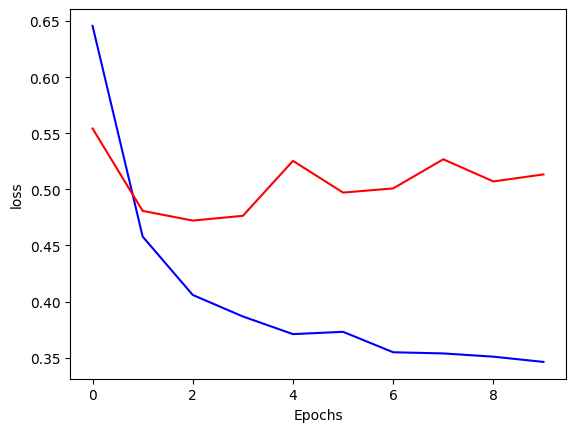

In [338]:
# Visualization of the training process on the loss function 
plt.plot(history_lstm.history["loss"], color="b")
plt.plot(history_lstm.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

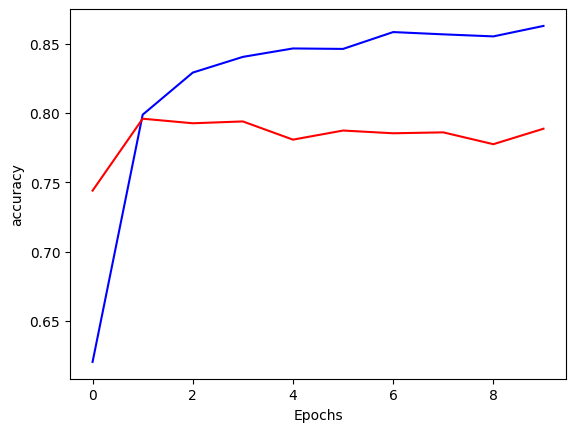

In [339]:
# Visualization of accuracy training 
plt.plot(history_lstm.history["accuracy"], color="b")
plt.plot(history_lstm.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

In [340]:
model_lstm.save("model_lstm.h5")

## predict the target test

In [341]:
df_test = pd.read_csv("test.csv")

In [342]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [343]:
len(df_test)

3263

Preprocessing text

In [344]:
# Remove all non alphanumeric characters except whitespaces
df_test["text_clean"] = df_test["text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
# remove double spaces and spaces at the beginning and end of strings
df_test["text_clean"] = df_test["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# remove stop words and replace everyword with their lemma
df_test["text_clean"] = df_test["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

In [349]:
tokenizer.fit_on_texts(df_test.text_clean)
df_test["text_encoded"] = tokenizer.texts_to_sequences(df_test.text_clean)

df_test_pad = tf.keras.preprocessing.sequence.pad_sequences(df_test.text_encoded, padding="post",maxlen=maxlen)

In [346]:
model_final = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[tweet.shape[1],],name="embedding"),
                  # Gobal average pooling
                  tf.keras.layers.GlobalAveragePooling1D(),

                  # Couche Dense classique
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),
                  
                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

optimizer= tf.keras.optimizers.Adam()

model_final.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model_final.fit(train_batch, 
                    epochs=4, 
                    validation_data=val_batch)
              

Epoch 1/4
96/96 [==============================] - 2s 14ms/step - loss: 0.6834 - accuracy: 0.5678 - val_loss: 0.6697 - val_accuracy: 0.5712
Epoch 2/4
96/96 [==============================] - 1s 13ms/step - loss: 0.6227 - accuracy: 0.6762 - val_loss: 0.5553 - val_accuracy: 0.7492
Epoch 3/4
96/96 [==============================] - 1s 14ms/step - loss: 0.4728 - accuracy: 0.8039 - val_loss: 0.4843 - val_accuracy: 0.7800
Epoch 4/4
96/96 [==============================] - 1s 14ms/step - loss: 0.4073 - accuracy: 0.8246 - val_loss: 0.4618 - val_accuracy: 0.7853


In [350]:
#Let's make predictions on the first batch of the test set
# test_input, test_target = next(iter(test_batch))
pred = model_final.predict(df_test_pad)
pred
# we get one porbability for each class

102/102 [==============================] - 0s 1ms/step


array([[0.18384506],
       [0.5068717 ],
       [0.08632001],
       ...,
       [0.1972876 ],
       [0.31671873],
       [0.20944427]], dtype=float32)

In [351]:
df_predict = pd.DataFrame(pred, columns=['proba'])
df_predict.head()

,proba
0,0.183845
1,0.506872
2,0.086320
3,0.235580
4,0.097124


In [352]:
df_predict["target"] = df_predict["proba"].apply(lambda x : 0 if x <0.5
                                    else 1)
df_predict

,proba,target
0,0.183845,0
1,0.506872,1
2,0.086320,0
3,0.235580,0
4,0.097124,0
...,...,...
3258,0.783964,1
3259,0.577003,1
3260,0.197288,0
3261,0.316719,0


In [353]:
df_predict['target'].value_counts()

0    1964
1    1299
Name: target, dtype: int64

In [354]:
output = pd.DataFrame({'id': df_test["id"],
                       'target': df_predict["target"]})
output.to_csv('submission.csv', index=False)